In [47]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,SimpleRNN,BatchNormalization,GRU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


In [ ]:
stock_name = "AAPL"

df = yf.download(stock_name, period="2y", interval="1h")
df.to_csv("stock.csv")


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed

(3495, 6, 1)
(3495, 6, 1)



c:\Users\Dell Latitude 5420\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 6, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0674 - val_loss: 3.0042e-04
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.1698e-04 - val_loss: 3.4527e-04
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.6103e-04 - val_loss: 2.3777e-04
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3453e-04 - val_loss: 5.2506e-04
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1242e-04 - val_loss: 7.6017e-04
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8611e-04 - val_loss: 2.1177e-04
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6686e-04 - val_loss: 2.5583e-04
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0518e-04 - val_loss: 1.9240e-04
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5528e-04 - val_loss: 5.2684e-04
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1452e-04 - val_loss: 6.1305e-04
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5

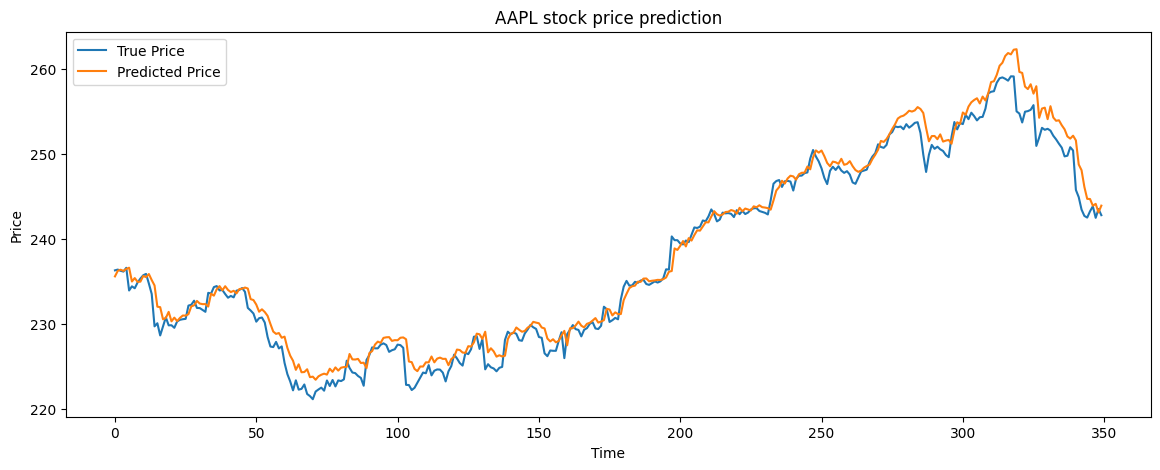

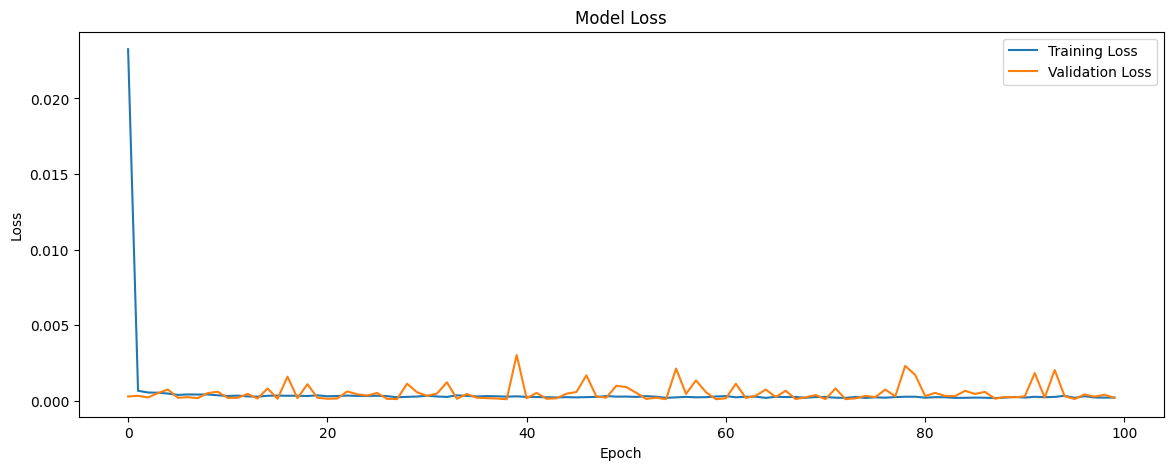

In [55]:
df = yf.download(stock_name, period="2y", interval="1h")
df_close = df["Close"]
## generate data by window with target 
def window_data(data, window_size):
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    print(np.array(X).shape) 
    return np.array(X), np.array(y).reshape(-1, 1)

df_windowed, df_target = window_data(df_close.to_numpy(), 6)
print(df_windowed.shape)
scaler = MinMaxScaler()
# Reshape df_windowed to 2D
df_windowed_reshaped = df_windowed.reshape(df_windowed.shape[0], -1)
x_scaler = scaler.fit(df_windowed_reshaped)
df_windowed_reshaped = x_scaler.transform(df_windowed_reshaped)
# Reshape back to 3D
df_windowed = df_windowed_reshaped.reshape(df_windowed.shape[0], df_windowed.shape[1], df_windowed.shape[2])
y_scaler = scaler.fit(df_target)
df_target = y_scaler.transform(df_target)
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

model_lstm = Sequential([
    LSTM(units=128, 
            return_sequences=True, 
            input_shape=(X_train.shape[1], X_train.shape[2])),
    # BatchNormalization(),
    Dropout(0.2),
    
    LSTM(units=64),
    # BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(1)
])
optimizer = Adam(learning_rate=0.01)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error')
model_lstm.summary()

history=model_lstm.fit(X_train, y_train, epochs=100, batch_size=32,    
    validation_split=0.1,
    verbose=1)
Y_pred = model_lstm.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred)
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Plot training history
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
##forecast for the next hour 
last_window = df_windowed[-1]
last_window = last_window.reshape(1, last_window.shape[0], last_window.shape[1])
forecast = model_lstm.predict(last_window)
forecast = y_scaler.inverse_transform(forecast)
forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[243.894]], dtype=float32)

In [62]:
df = yf.download(stock_name, period="2y",interval='1h')
# # print(df)
# cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# df.columns = cols
# df["Close"].to_numpy().reshape(-1,1)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,,
2023-01-03 18:30:00+00:00,124.570000,124.570000,125.000000,124.190002,124.669899,0
2023-01-03 19:30:00+00:00,124.620003,124.620003,125.330002,124.169998,124.578003,11718707
2023-01-03 20:30:00+00:00,125.050003,125.050003,125.419998,124.625000,124.629997,10631332
2023-01-04 14:30:00+00:00,125.998299,125.998299,127.555000,125.080002,126.889999,25459455
2023-01-04 15:30:00+00:00,127.379997,127.379997,127.500000,125.334000,125.989998,11053975
...,...,...,...,...,...,...
2025-01-03 14:30:00+00:00,242.459793,242.459793,244.179993,241.889999,243.369995,9135529
2025-01-03 15:30:00+00:00,243.490005,243.490005,243.675598,242.139999,242.449997,4968036


[*********************100%***********************]  1 of 1 completed
c:\Users\Dell Latitude 5420\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 6, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,617 (467.25 KB)

 Trainable params: 119,617 (467.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0352 - val_loss: 0.0036
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - val_loss: 2.0651e-04
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 1.8725e-04
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 2.4240e-04
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 9.2202e-04
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 4.5936e-04
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 1.8864e-04
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 2.3465e-04
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 2.7049e-04
Epoch 12/100
89/89 ━

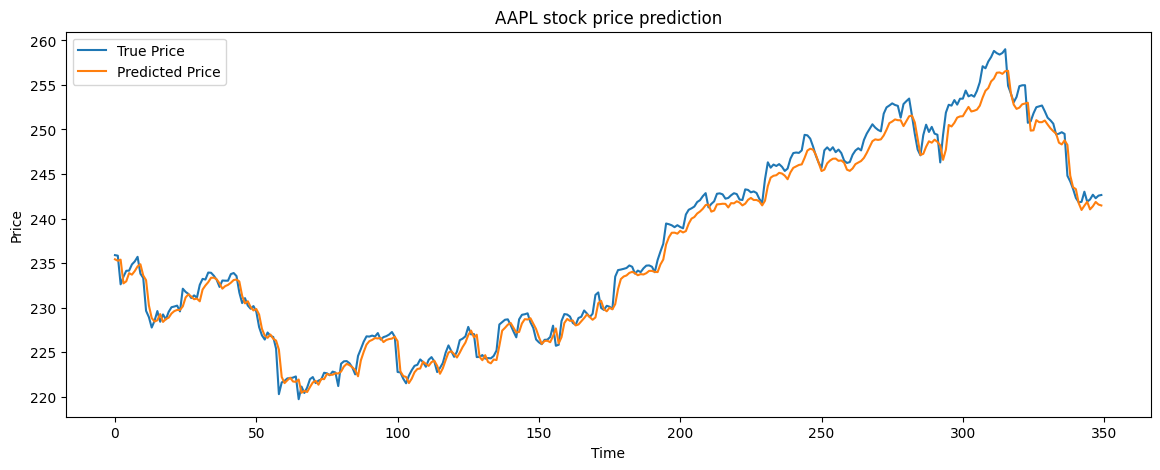

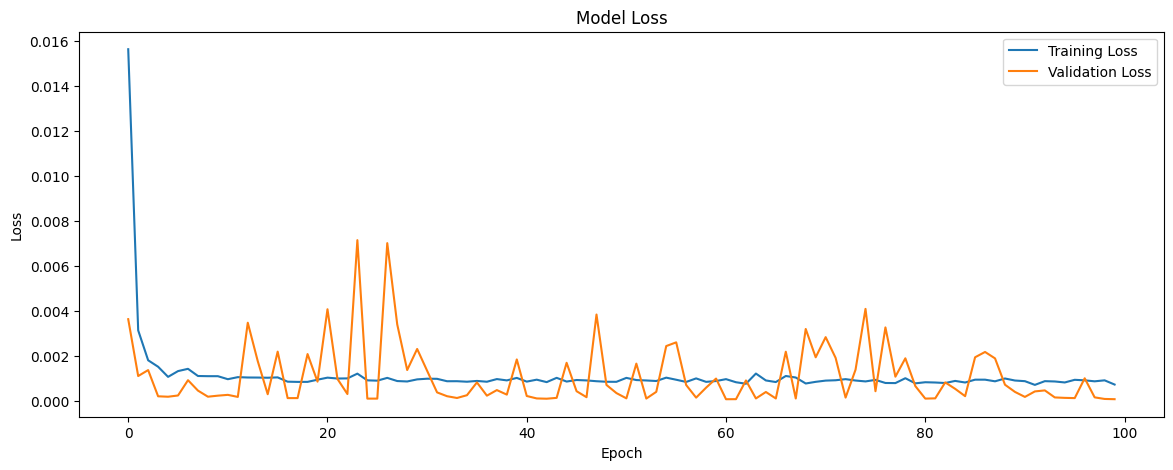

In [63]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df = yf.download(stock_name, period="2y",interval='1h')
# print(df)
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.columns = cols

def window_data_multivariate(data, window_size):
    """
    Generate windowed data using multiple features to predict closing price
    
    Parameters:
    data (numpy array): Input data of shape (n_samples, n_features)
    window_size (int): Number of time steps to look back
    
    Returns:
    X (numpy array): Input windows of shape (n_samples, window_size, n_features)
    y (numpy array): Target closing prices of shape (n_samples, 1)
    """
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        # Window includes all features
        X.append(data[i:(i + window_size), :])
        # Target is next day's closing price
        y.append(data[i + window_size, 0])  # Closing price is first column
        
    return np.array(X), np.array(y).reshape(-1, 1)

# Prepare feature DataFrame - adjust these columns based on your available data
df_features = df[['Close', 'High', 'Low', 'Volume']].copy()

# Scale all features
scaler_features = MinMaxScaler()
df_scaled = scaler_features.fit_transform(df_features)

# Create separate scaler for closing price (target)
scaler_target = MinMaxScaler()
scaler_target.fit(df_features['Close'].values.reshape(-1, 1))

# Generate windowed data
df_windowed, df_target = window_data_multivariate(df_scaled, window_size=6)
# print(df_windowed)

# Split into train and test sets
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

# Create and compile the model
model_lstm_multi = Sequential([
    LSTM(units=128, 
            return_sequences=True, 
            input_shape=(X_train.shape[1], X_train.shape[2])),
    # BatchNormalization(),
    Dropout(0.2),
    
    LSTM(units=64),
    # BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    # BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

optimizer = Adam(learning_rate=0.01)
model_lstm_multi.compile(optimizer=optimizer, loss='mean_squared_error')
model_lstm_multi.summary()

# Train the model
history = model_lstm_multi.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    verbose=1
)

# Make predictions
X_pred = model_lstm_multi.predict(X_test)

# Inverse transform predictions and actual values
# We can directly use scaler_target since we're only dealing with closing prices
y_pred = scaler_target.inverse_transform(X_pred)
y_test_transformed = scaler_target.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test_transformed, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
#forecast for the next hour
last_window = df_windowed[-1]
last_window = last_window.reshape(1, last_window.shape[0], last_window.shape[1])
forecast = model_lstm_multi.predict(last_window)
forecast = scaler_target.inverse_transform(forecast)
forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[241.46622]], dtype=float32)

In [ ]:
df = yf.download(stock_name, period="2y", interval="1h")
df_close = df["Close"]
## generate data by window with target 
def window_data(data, window_size):
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
        
    return np.array(X), np.array(y).reshape(-1, 1)

df_windowed, df_target = window_data(df_close.to_numpy(), 6)
scaler = MinMaxScaler()
# Reshape df_windowed to 2D
df_windowed_reshaped = df_windowed.reshape(df_windowed.shape[0], -1)
x_scaler = scaler.fit(df_windowed_reshaped)
df_windowed_reshaped = x_scaler.transform(df_windowed_reshaped)
# Reshape back to 3D
df_windowed = df_windowed_reshaped.reshape(df_windowed.shape[0], df_windowed.shape[1], df_windowed.shape[2])
y_scaler = scaler.fit(df_target)
df_target = y_scaler.transform(df_target)
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

model_rnn = Sequential([
    SimpleRNN(units=128,
            return_sequences=True,
            input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(units=64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.01)
model_rnn.compile(optimizer=optimizer, loss='mean_squared_error')
model_rnn.summary()

history=model_rnn.fit(X_train, y_train, epochs=100, batch_size=32,    
    validation_split=0.1,
    verbose=1)
Y_pred = model_rnn.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred)
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()





In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df = yf.download(stock_name, period="2y",interval='1h')
# print(df)
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.columns = cols
def window_data_multivariate(data, window_size):
    """
    Generate windowed data using multiple features to predict closing price
    
    Parameters:
    data (numpy array): Input data of shape (n_samples, n_features)
    window_size (int): Number of time steps to look back
    
    Returns:
    X (numpy array): Input windows of shape (n_samples, window_size, n_features)
    y (numpy array): Target closing prices of shape (n_samples, 1)
    """
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        # Window includes all features
        X.append(data[i:(i + window_size), :])
        # Target is next day's closing price
        y.append(data[i + window_size, 0])  # Closing price is first column
        
    return np.array(X), np.array(y).reshape(-1, 1)

# Prepare feature DataFrame - adjust these columns based on your available data
df_features = df[['Close', 'High', 'Low', 'Volume']].copy()

# Scale all features
scaler_features = MinMaxScaler()
df_scaled = scaler_features.fit_transform(df_features)

# Create separate scaler for closing price (target)
scaler_target = MinMaxScaler()
scaler_target.fit(df_features['Close'].values.reshape(-1, 1))

# Generate windowed data
df_windowed, df_target = window_data_multivariate(df_scaled, window_size=6)
# print(df_windowed)

# Split into train and test sets
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

# Create and compile the model
model_rnn_multi = Sequential([
    SimpleRNN(units=128,
            return_sequences=True,
            input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(units=64),
    Dropout(0.2),
    # Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.01)
model_rnn_multi.compile(optimizer=optimizer, loss='mean_squared_error')
model_rnn_multi.summary()

# Train the model
history = model_rnn_multi.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    verbose=1
)

# Make predictions
X_pred = model_rnn_multi.predict(X_test)

# Inverse transform predictions and actual values
# We can directly use scaler_target since we're only dealing with closing prices
y_pred = scaler_target.inverse_transform(X_pred)
y_test_transformed = scaler_target.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test_transformed, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
c:\Users\Dell Latitude 5420\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.07513740
Iteration 2, loss = 0.00667252
Iteration 3, loss = 0.00142782
Iteration 4, loss = 0.00068404
Iteration 5, loss = 0.00025069
Iteration 6, loss = 0.00013817
Iteration 7, loss = 0.00011687
Iteration 8, loss = 0.00011188
Iteration 9, loss = 0.00010934
Iteration 10, loss = 0.00010871
Iteration 11, loss = 0.00010600
Iteration 12, loss = 0.00010451
Iteration 13, loss = 0.00010243
Iteration 14, loss = 0.00010002
Iteration 15, loss = 0.00009784
Iteration 16, loss = 0.00009511
Iteration 17, loss = 0.00009275
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


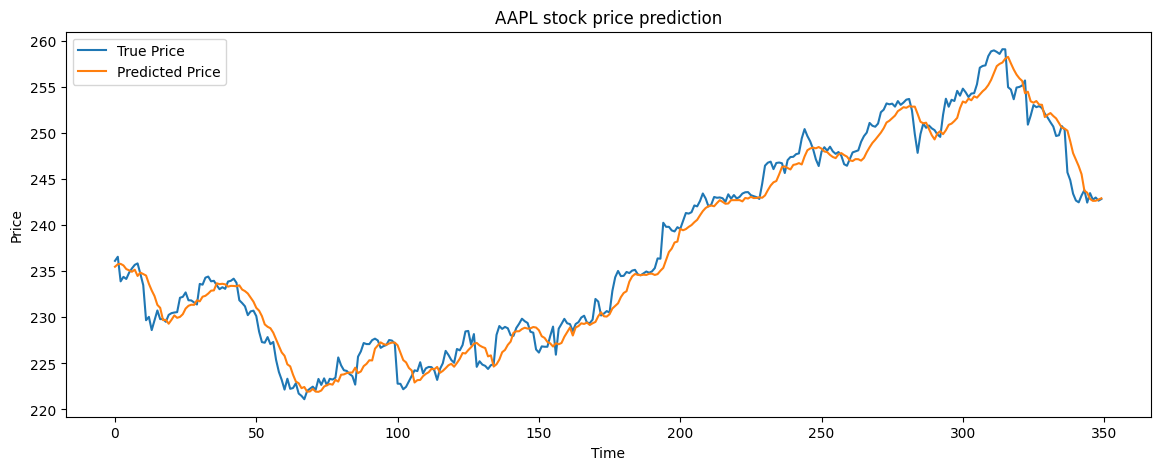

In [68]:
df = yf.download(stock_name, period="2y", interval="1h")
df_close = df["Close"]
## generate data by window with target 
def window_data(data, window_size):
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
        
    return np.array(X), np.array(y).reshape(-1, 1)

df_windowed, df_target = window_data(df_close.to_numpy(), 6)
scaler = MinMaxScaler()
# Reshape df_windowed to 2D
df_windowed_reshaped = df_windowed.reshape(df_windowed.shape[0], -1)
x_scaler = scaler.fit(df_windowed_reshaped)
df_windowed_reshaped = x_scaler.transform(df_windowed_reshaped)
# Reshape back to 3D
df_windowed = df_windowed_reshaped.reshape(df_windowed.shape[0], df_windowed.shape[1], df_windowed.shape[2])
y_scaler = scaler.fit(df_target)
df_target = y_scaler.transform(df_target)
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]


## MLP model 
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=100, verbose=True)
model_mlp.fit(X_train.reshape(X_train.shape[0], -1), y_train)
Y_pred = model_mlp.predict(X_test.reshape(X_test.shape[0], -1))
Y_pred = y_scaler.inverse_transform(Y_pred.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

    



In [ ]:
#forecast for the next n hours
last_window = df_windowed[-1]
last_window = last_window.reshape(1, last_window.shape[0], last_window.shape[1])
forecast = model_rnn.predict(last_window)
forecast = y_scaler.inverse_transform(forecast)
forecast


[*********************100%***********************]  1 of 1 completed
c:\Users\Dell Latitude 5420\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.01315248
Iteration 2, loss = 0.00153874
Iteration 3, loss = 0.00034703
Iteration 4, loss = 0.00019697
Iteration 5, loss = 0.00015260
Iteration 6, loss = 0.00012667
Iteration 7, loss = 0.00010767
Iteration 8, loss = 0.00009584
Iteration 9, loss = 0.00009109
Iteration 10, loss = 0.00008662
Iteration 11, loss = 0.00008457
Iteration 12, loss = 0.00008111
Iteration 13, loss = 0.00007904
Iteration 14, loss = 0.00007898
Iteration 15, loss = 0.00007607
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


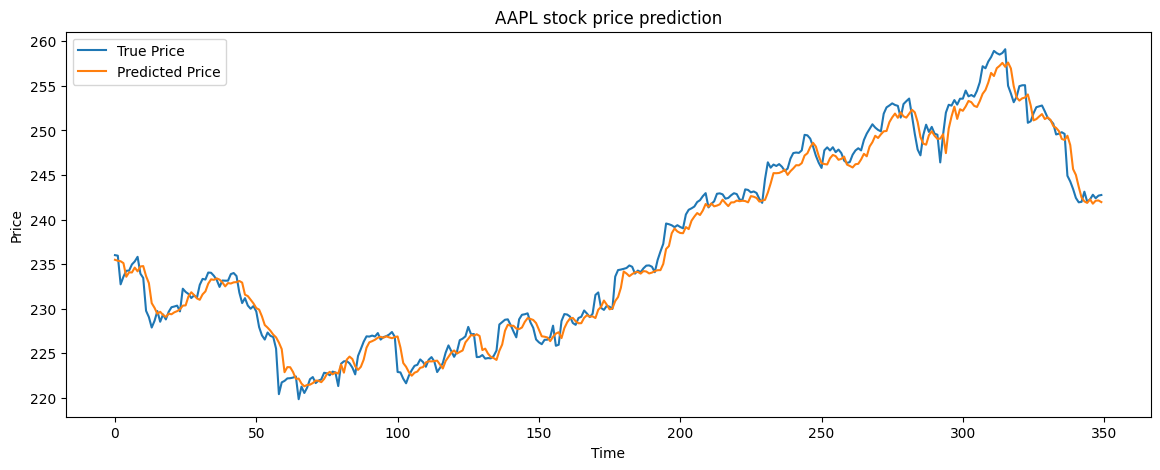

In [65]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df = yf.download(stock_name, period="2y",interval='1h')
# print(df)
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.columns = cols
def window_data_multivariate(data, window_size):
    """
    Generate windowed data using multiple features to predict closing price
    
    Parameters:
    data (numpy array): Input data of shape (n_samples, n_features)
    window_size (int): Number of time steps to look back
    
    Returns:
    X (numpy array): Input windows of shape (n_samples, window_size, n_features)
    y (numpy array): Target closing prices of shape (n_samples, 1)
    """
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        # Window includes all features
        X.append(data[i:(i + window_size), :])
        # Target is next day's closing price
        y.append(data[i + window_size, 0])  # Closing price is first column
        
    return np.array(X), np.array(y).reshape(-1, 1)

# Prepare feature DataFrame - adjust these columns based on your available data
df_features = df[['Close', 'High', 'Low', 'Volume']].copy()

# Scale all features
scaler_features = MinMaxScaler()
df_scaled = scaler_features.fit_transform(df_features)

# Create separate scaler for closing price (target)
scaler_target = MinMaxScaler()
scaler_target.fit(df_features['Close'].values.reshape(-1, 1))

# Generate windowed data
df_windowed, df_target = window_data_multivariate(df_scaled, window_size=6)
# print(df_windowed)

# Split into train and test sets
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

## MLP model 
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=100, verbose=True)
model_mlp.fit(X_train.reshape(X_train.shape[0], -1), y_train)
Y_pred = model_mlp.predict(X_test.reshape(X_test.shape[0], -1))
Y_pred = y_scaler.inverse_transform(Y_pred.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()


In [67]:
#forecast for the next 7 hours


array([[241.84650536]])

In [ ]:
df = yf.download(stock_name, period="2y", interval="1h")
df_close = df["Close"]
## generate data by window with target 
def window_data(data, window_size):
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
        
    return np.array(X), np.array(y).reshape(-1, 1)

df_windowed, df_target = window_data(df_close.to_numpy(), 6)
scaler = MinMaxScaler()
# Reshape df_windowed to 2D
df_windowed_reshaped = df_windowed.reshape(df_windowed.shape[0], -1)
x_scaler = scaler.fit(df_windowed_reshaped)
df_windowed_reshaped = x_scaler.transform(df_windowed_reshaped)
# Reshape back to 3D
df_windowed = df_windowed_reshaped.reshape(df_windowed.shape[0], df_windowed.shape[1], df_windowed.shape[2])
y_scaler = scaler.fit(df_target)
df_target = y_scaler.transform(df_target)
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]


## random forest Reg
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=1000, verbose=1,criterion='friedman_mse',n_jobs=-1)
model_RF.fit(X_train.reshape(X_train.shape[0], -1), y_train)
Y_pred = model_RF.predict(X_test.reshape(X_test.shape[0], -1))
Y_pred = y_scaler.inverse_transform(Y_pred.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()




In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df = yf.download(stock_name, period="2y",interval='1h')
# print(df)
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.columns = cols
def window_data_multivariate(data, window_size):
    """
    Generate windowed data using multiple features to predict closing price
    
    Parameters:
    data (numpy array): Input data of shape (n_samples, n_features)
    window_size (int): Number of time steps to look back
    
    Returns:
    X (numpy array): Input windows of shape (n_samples, window_size, n_features)
    y (numpy array): Target closing prices of shape (n_samples, 1)
    """
    X = []
    y = []
    
    for i in range(len(data) - window_size - 1):
        # Window includes all features
        X.append(data[i:(i + window_size), :])
        # Target is next day's closing price
        y.append(data[i + window_size, 0])  # Closing price is first column
        
    return np.array(X), np.array(y).reshape(-1, 1)

# Prepare feature DataFrame - adjust these columns based on your available data
df_features = df[['Close', 'High', 'Low', 'Volume']].copy()

# Scale all features
scaler_features = MinMaxScaler()
df_scaled = scaler_features.fit_transform(df_features)

# Create separate scaler for closing price (target)
scaler_target = MinMaxScaler()
scaler_target.fit(df_features['Close'].values.reshape(-1, 1))

# Generate windowed data
df_windowed, df_target = window_data_multivariate(df_scaled, window_size=6)
# print(df_windowed)

# Split into train and test sets
train_size = int(0.9 * len(df_windowed))
X_train = df_windowed[:train_size]
y_train = df_target[:train_size]
X_test = df_windowed[train_size:]
y_test = df_target[train_size:]

## random forest Reg
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=1000, verbose=1,criterion='friedman_mse',n_jobs=-1)
model_RF.fit(X_train.reshape(X_train.shape[0], -1), y_train)
Y_pred = model_RF.predict(X_test.reshape(X_test.shape[0], -1))
Y_pred = y_scaler.inverse_transform(Y_pred.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True Price')
plt.plot(Y_pred, label='Predicted Price')
plt.title(f'{stock_name} stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [ ]:
class StockModels:
    def __init__(self):
        self.model = None
        self.forecasted_data = None
        self.data = yf.download(stock_name, period="2y",interval='1h')
        # print(df)
        cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        self.data.columns = cols
        self.window_size = 6
        self.windowed_data_multi,self.target_multi = self.generate_windowed_data(True)
        self.windowed_data,self.target = self.generate_windowed_data(False)
        self.train_size_multi = int(0.8*len(self.windowed_data_multi))
        self.train_size = int(0.8*len(self.windowed_data))
        self.X_train_multi,self.Y_train_multi,self.X_test_multi,self.Y_test_multi = self.windowed_data_multi[:self.train_size_multi],self.target_multi[:self.train_size_multi],self.windowed_data_multi[self.train_size_multi:],self.target_multi[self.train_size_multi:]
        self.X_train,self.Y_train,self.Y_test,self.X_test = self.windowed_data[:self.train_size],self.target[:self.train_size],self.windowed_data[self.train_size:],self.target[self.train_size:]
        
    def generate_windowed_data(self,multivariante:bool=False):
        if multivariante:
            def window_data_multivariate(data, window_size):
                X = []
                y = []
                for i in range(len(data) - window_size - 1):
                    # Window includes all features
                    X.append(data[i:(i + window_size), :])
                    # Target is next day's closing price
                    y.append(data[i + window_size, 0])  # Closing price is first column
                return np.array(X), np.array(y).reshape(-1, 1)
            return window_data_multivariate(self.data,self.window_size)
        def window_data(data, window_size):
            X = []
            y = []
            
            for i in range(len(data) - window_size - 1):
                X.append(data[i:(i + window_size)])
                y.append(data[i + window_size])
                
            return np.array(X), np.array(y).reshape(-1, 1)
        return window_data(self.data,self.window_size)
            
    def train_and_save_models(self):
        lstm_model = Sequential([
            LSTM(units=128, 
                    return_sequences=True, 
                    input_shape=(self.X_train.shape[1], self.X_train.shape[2])),
            Dropout(0.2),
            
            LSTM(units=64),
            Dropout(0.2),
            
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ])
        
        
        